In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Load dataset


In [27]:
data = pd.read_csv('/content/drive/MyDrive/loan_approval_dataset.csv')
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# Remove leading spaces from column names

In [28]:
data.columns = data.columns.str.strip()

# Encoding categorical variables

In [29]:
label_enc = LabelEncoder()
data['education'] = label_enc.fit_transform(data['education'])
data['self_employed'] = label_enc.fit_transform(data['self_employed'])
print(data.head())

   loan_id  no_of_dependents  education  self_employed  income_annum  \
0        1                 2          0              0       9600000   
1        2                 0          1              1       4100000   
2        3                 3          0              0       9100000   
3        4                 3          0              0       8200000   
4        5                 5          1              1       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  
0                 17600000             22700000           8000000    Approved 

# Print encoding mappings

In [30]:
print("Education Mapping:", dict(enumerate(label_enc.classes_)))

label_enc = LabelEncoder()
data['self_employed'] = label_enc.fit_transform(data['self_employed'])

print("Self Employed Mapping:", dict(enumerate(label_enc.classes_)))

Education Mapping: {0: ' No', 1: ' Yes'}
Self Employed Mapping: {0: np.int64(0), 1: np.int64(1)}


# Splitting data into features and target

In [31]:
X = data.drop(columns=['loan_status', 'loan_id'])
y = data['loan_status']

# Feature scaling

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting into train and test sets

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Models dictionary

In [34]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(kernel='linear', random_state=42)
}

# Training and evaluating models

In [35]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }


# Convert results to DataFrame

In [36]:
results_df = pd.DataFrame(results).T

# Selecting the best model

In [37]:
best_model_name = results_df['Accuracy'].idxmax()
best_model = models[best_model_name]


# Save the best model

In [38]:
joblib.dump(best_model, "best_loan_model.pkl")

['best_loan_model.pkl']

# Visualization

<ipython-input-39-7fc78718f9f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['Accuracy'], palette='viridis')


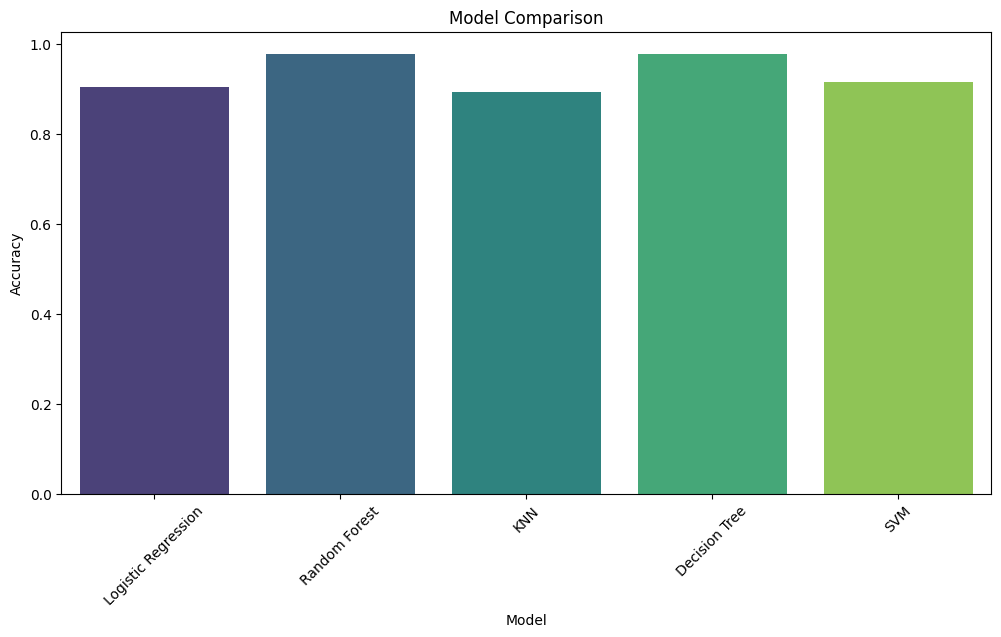

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y=results_df['Accuracy'], palette='viridis')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.show()

# Print best model

In [40]:
def print_best_model():
    print(f"Best Model: {best_model_name} with Accuracy: {results_df.loc[best_model_name, 'Accuracy']:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, best_model.predict(X_test)))

print_best_model()

Best Model: Random Forest with Accuracy: 0.9789

Classification Report:
              precision    recall  f1-score   support

    Approved       0.98      0.99      0.98       536
    Rejected       0.98      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



# Function to take user input and predict loan approval

In [41]:
def predict_loan():
    user_input = {}

    for column in X.columns:
        value = input(f"Enter {column}: ")
        try:
            user_input[column] = float(value)
        except ValueError:
            user_input[column] = value

    # Convert to DataFrame
    user_df = pd.DataFrame([user_input])

    # Encode categorical features
    user_df['education'] = label_enc.transform(user_df['education'])
    user_df['self_employed'] = label_enc.transform(user_df['self_employed'])

    # Scale numerical features
    user_scaled = scaler.transform(user_df)

    # Load the best model
    model = joblib.load("best_loan_model.pkl")

    # Make prediction
    prediction = model.predict(user_scaled)

    print("Loan Status Prediction:", "Approved" if prediction[0] == 1 else "Rejected")

# Call the function to take input and predict
predict_loan()  # Uncomment to run


Enter no_of_dependents: 0
Enter education: 1
Enter self_employed: 1
Enter income_annum: 4100000
Enter loan_amount: 12200000
Enter loan_term: 8
Enter cibil_score: 417
Enter residential_assets_value: 2700000
Enter commercial_assets_value: 2200000
Enter luxury_assets_value: 8800000
Enter bank_asset_value: 3300000
Loan Status Prediction: Rejected
